In [1]:
from autograd import multigrad_dict
from sympy import symbols
import numdifftools as nd
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
%matplotlib inline


In [2]:
alpha = 2
e = 0.1 
x = [1, 1]
x1 = [1, 1]
h = 1

In [3]:
def func(x): 
    return 2*x[0]**2 + 5*x[1]**2 + x[0]*x[1] - 3*x[0] - x[1] + 5

In [4]:
def find_min(alpha, e, x, h):
    
    while abs(h) > e:
        if func([x[0] + h * e, x[1]]) < func(x):
            x1 = [x[0] + h * e, x[1]]
        elif func([x[0] - h * e, x[1]]) < func(x):
            x1 = [x[0] - h * e, x[1]]
        else:
            if func([x[0], x[1] + h * e]) < func(x):
                x1 = [x[0], x[1] + h * e]
            elif func([x[0], x[1] - h * e]) < func(x):
                x1 = [x[0], x[1] - h * e]
        if func(x1) == func(x):
            h = h / alpha
        else:
            x = x1
    return [x, func(x)]

In [5]:
x_min = np.array(find_min(alpha, e, x, h)[0])
f_min = find_min(alpha, e, x, h)[1]
print(f'Минимум функции достигается в точке с координатами ({x_min[0]}; {f_min}; {x_min[1]})') 

Минимум функции достигается в точке с координатами (0.7500000000000001; 3.8718749999999997; 0.02500000000000014)


In [6]:
def f(x1, x2):
    return 2 * x1 * x1 + 5 * x2 * x2 + x1 * x2 - 3 * x1 - x2 + 5 

In [7]:
def plot_3d(x_min, f_min, POV=[45, 40]):
    dot = x_min * 10
    fig = plt.figure(figsize=(20, 12))
    ax = plt.axes(projection='3d')
    
    X, Y = np.meshgrid(np.linspace(-abs(dot[0]), abs(dot[0]), 1000), np.linspace(-abs(dot[1]), abs(dot[1]), 1000)) 
    Z = f(X, Y)
    
    ax.scatter(x_min[0], x_min[1], f_min, c='purple', s=80)
    ax.plot_wireframe(X, Y, Z, color ='plum')
    ax.view_init(POV[0], POV[1])
    plt.show()

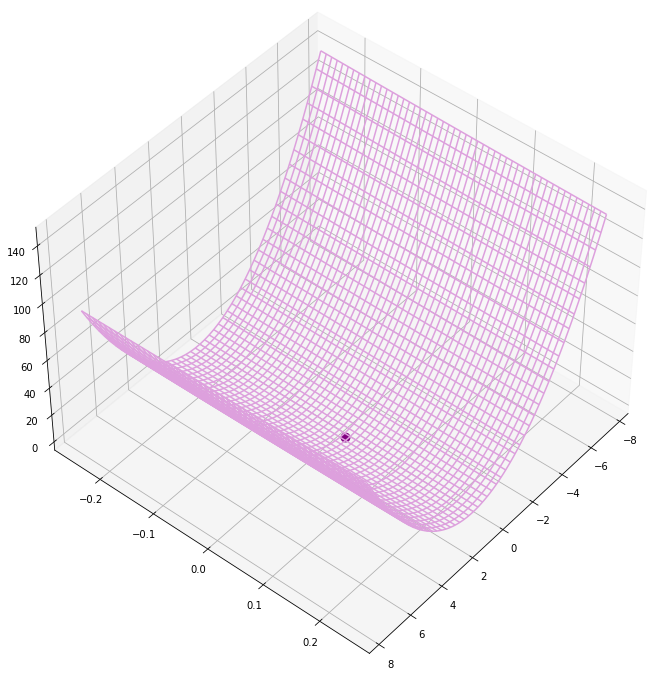

In [8]:
plot_3d(x_min, f_min, POV=[45, 40]) 